<a href="https://colab.research.google.com/github/Anudeepsadda/Medicinal_Plants_Leaves_Classification_Using_DeepLearning_and_Image_Processing/blob/main/Plant_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from PIL import UnidentifiedImageError

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import UnidentifiedImageError

# Define paths
main_dataset_dir = '/content/drive/MyDrive/Indian Medicinal Leaves Image Datasets/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset'
augmented_train_dir = 'dataset_6/augmented_train'

In [ ]:
# Create directories if they don't exist
os.makedirs(augmented_train_dir, exist_ok=True)

# List all classes, ignoring hidden files
classes = [d for d in os.listdir(main_dataset_dir) if os.path.isdir(os.path.join(main_dataset_dir, d)) and not d.startswith('.')]

# Define the data augmentation generator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

desired_num_images = 1000

for cls in classes:
    class_dir = os.path.join(main_dataset_dir, cls)
    augmented_train_class_dir = os.path.join(augmented_train_dir, cls)

    os.makedirs(augmented_train_class_dir, exist_ok=True)

    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    if not images:
        print(f"No images found for class {cls}. Skipping...")
        continue

    # Split data: 100% for augmentation
    train_images = images

    def generate_augmented_images(image_list, target_dir, required_images):
        """Generates augmented images to reach the required total count."""
        for img_name in image_list:
            img_path = os.path.join(class_dir, img_name)
            try:
                img = load_img(img_path, target_size=(128, 128))   # Adjust the target size as needed
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)

                # Calculate number of augmentations needed per original image
                num_augmented_samples = max((required_images - len(image_list)) // len(image_list), 0)

                i = 0
                for batch in datagen.flow(x, batch_size=1, save_to_dir=target_dir, save_prefix='aug', save_format='jpg'):
                    i += 1
                    if i >= num_augmented_samples:
                        break
            except UnidentifiedImageError:
                print(f"Cannot identify image file {img_path}. Skipping...")

    # Generate augmented images for training set
    generate_augmented_images(train_images, augmented_train_class_dir, desired_num_images)

    # Copy remaining original images to the training set if needed to reach desired count
    current_train_images = len(os.listdir(augmented_train_class_dir))
    if current_train_images < desired_num_images:
        for img_name in train_images:
            img_path = os.path.join(class_dir, img_name)
            try:
                shutil.copy(img_path, augmented_train_class_dir)
            except Exception as e:
                print(f"Error copying image {img_path}: {e}")

print("Augmented training data generation complete.")

Augmented training data generation complete.


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
augmented_train_dir = 'dataset_6/augmented_train'
train_dir = 'dataset_6/train'
validation_dir = 'dataset_6/validation'

In [ ]:
# Create directories for training and validation if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# List all classes
classes = [d for d in os.listdir(augmented_train_dir) if os.path.isdir(os.path.join(augmented_train_dir, d)) and not d.startswith('.')]

for cls in classes:
    class_augmented_dir = os.path.join(augmented_train_dir, cls)
    class_train_dir = os.path.join(train_dir, cls)
    class_validation_dir = os.path.join(validation_dir, cls)

    # Create directories for each class in train and validation directories
    os.makedirs(class_train_dir, exist_ok=True)
    os.makedirs(class_validation_dir, exist_ok=True)

    # List all images in the class directory
    images = [f for f in os.listdir(class_augmented_dir) if os.path.isfile(os.path.join(class_augmented_dir, f))]

    if len(images) == 0:
        print(f"No images found in {class_augmented_dir}. Skipping...")
        continue

    print(f"Processing {len(images)} images for class {cls}.")

    # Split the images into training and validation sets
    try:
        train_images, validation_images = train_test_split(images, test_size=0.2, random_state=42)
    except ValueError as e:
        print(f"Error splitting images for class {cls}: {e}")
        continue

    # Copy training images to the train directory
    for img_name in train_images:
        src = os.path.join(class_augmented_dir, img_name)
        dst = os.path.join(class_train_dir, img_name)
        shutil.copy(src, dst)

    # Copy validation images to the validation directory
    for img_name in validation_images:
        src = os.path.join(class_augmented_dir, img_name)
        dst = os.path.join(class_validation_dir, img_name)
        shutil.copy(src, dst)

print("Training and validation data split complete.")

Processing 842 images for class Betel_Nut.
Processing 875 images for class Betel.
Processing 855 images for class Basale.
Processing 847 images for class Avacado.
Processing 845 images for class Amruta_Balli.
Processing 854 images for class Bamboo.
Processing 855 images for class Amla.
Processing 936 images for class Pomegranate.
Processing 848 images for class Arali.
Processing 847 images for class Brahmi.
Processing 851 images for class Ashoka.
Processing 848 images for class Pepper.
Processing 897 images for class Castor.
Processing 954 images for class Aloevera.
Processing 841 images for class Ashwagandha.
Training and validation data split complete.


In [ ]:
image_size = (128, 128)
batch_size = 32

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir ,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10390 images belonging to 15 classes.
Found 2605 images belonging to 15 classes.


In [ ]:
classes = [d for d in os.listdir(augmented_train_dir) if os.path.isdir(os.path.join(augmented_train_dir, d)) and not d.startswith('.')]

In [ ]:
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


325/325 ━━━━━━━━━━━━━━━━━━━━ 33s 78ms/step - accuracy: 0.2880 - loss: 2.1713 - val_accuracy: 0.6576 - val_loss: 1.0155
Epoch 2/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.6831 - loss: 0.9545 - val_accuracy: 0.8541 - val_loss: 0.4607
Epoch 3/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8373 - loss: 0.5039 - val_accuracy: 0.8115 - val_loss: 0.5474
Epoch 4/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.8883 - loss: 0.3383 - val_accuracy: 0.9167 - val_loss: 0.2732
Epoch 5/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9361 - loss: 0.1998 - val_accuracy: 0.9175 - val_loss: 0.2772
Epoch 6/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9474 - loss: 0.1666 - val_accuracy: 0.9263 - val_loss: 0.2359
Epoch 7/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9540 - loss: 0.1392 - val_accuracy: 0.9359 - val_loss: 0.2045
Epoch 8/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.9653 - loss: 0.1098 - val_accurac

In [ ]:
model.save('plant_classifier_2.h5')

In [ ]:
val_loss,val_accuarcy=model.evaluate(val_generator)
print(f"Validation accuarcy:{val_accuarcy *100:.2f}%")

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9511 - loss: 0.1579
Validation accuarcy:94.66%


In [ ]:
train_loss,train_accuarcy=model.evaluate(train_generator)
print(f"traning accuarcy:{train_accuarcy *100:.2f}%")

325/325 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9946 - loss: 0.0208
traning accuarcy:99.43%


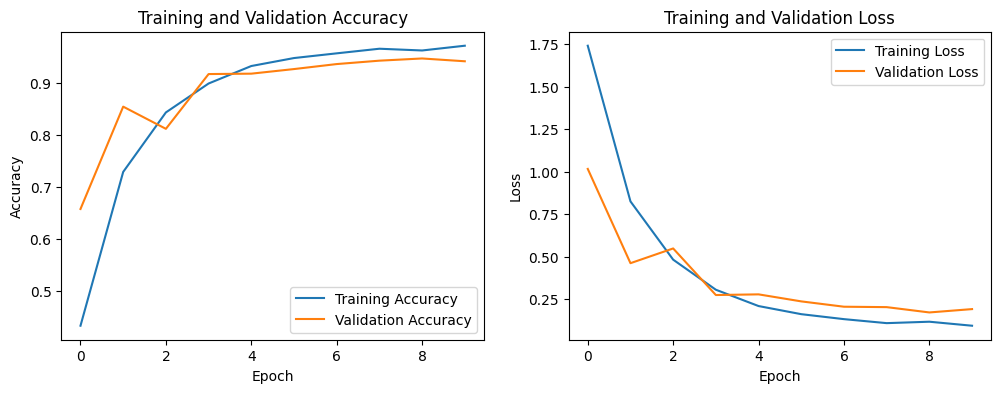

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

# Define paths
validation_dir = 'dataset_6/validation'

# Define your validation data generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict on the validation data
steps = int(np.ceil(validation_generator.samples / validation_generator.batch_size))
predictions = model.predict(validation_generator, steps=steps)
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

Found 2605 images belonging to 15 classes.
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step
              precision    recall  f1-score   support

    Aloevera       0.92      0.97      0.94       191
        Amla       0.89      0.95      0.92       171
Amruta_Balli       0.90      0.85      0.87       169
       Arali       0.99      0.99      0.99       170
      Ashoka       0.94      1.00      0.97       171
 Ashwagandha       0.97      0.92      0.95       169
     Avacado       0.96      0.97      0.97       170
      Bamboo       0.97      0.97      0.97       171
      Basale       0.87      0.95      0.91       171
       Betel       0.96      0.93      0.94       175
   Betel_Nut       0.99      0.95      0.97       169
      Brahmi       0.94      0.96      0.95       170
      Castor       0.96      0.89      0.93       180
      Pepper       0.97      0.96      0.97       170
 Pomegranate       0.98      0.93      0.95       188

    accuracy                           0.95      26

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [ ]:
model = load_model('plant_classifier_2.h5')

In [ ]:
def preprocess_image(image_path, target_size=(128, 128)):
    try:
        img = load_img(image_path, target_size=target_size)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalize the image
        return img_array
    except UnidentifiedImageError:
        print("Error: The image at the specified path could not be identified.")
        return None


In [ ]:
def predict_leaf_name(image_path, model, class_indices):
    processed_image = preprocess_image(image_path)
    if processed_image is None:
        return
    prediction = model.predict(processed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label


In [ ]:
class_indices = train_generator.class_indices

In [ ]:
image_path = '/content/dataset_6/validation/Amla/1396.jpg'
predicted_leaf_name = predict_leaf_name(image_path, model, class_indices)
print(f"Predicted Leaf Name: {predicted_leaf_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Leaf Name: Amla


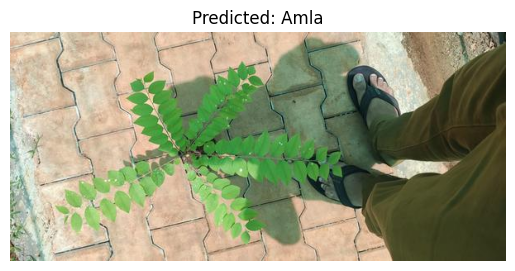

In [ ]:
 def plot_image_with_prediction(image_path, predicted_label):
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

plot_image_with_prediction(image_path, predicted_leaf_name)

Plant Predictions

In [ ]:
import os
import numpy as np
import pandas as pd
import requests
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from PIL import UnidentifiedImageError

In [ ]:
model = load_model('plant_classifier_2.h5')

In [ ]:
df = pd.read_csv('plant.csv')

In [ ]:
print(df.columns)

Index(['Plant_name', 'Scientific_name', 'uses', 'Description'], dtype='object')


In [ ]:
plant_names = df['Plant_name'].values
scientific_names = df['Scientific_name'].values
features = df['uses'].values

In [ ]:
class_indices = {name: idx for idx, name in enumerate(plant_names)}
plant_uses = {name: feature for name, feature in zip(plant_names, features)}

In [ ]:
image_dir = 'Medicinal plant dataset'
os.makedirs(image_dir, exist_ok=True)

In [ ]:
def preprocess_image(image_path, target_size=(128, 128)):
    try:
        img = load_img(image_path, target_size=target_size)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalize the image
        return img_array
    except UnidentifiedImageError:
        print("Error: The image at the specified path could not be identified.")
        return None


In [ ]:
def predict_leaf_name(image_path, model, class_indices):
    processed_image = preprocess_image(image_path)
    if processed_image is None:
        return None, None
    prediction = model.predict(processed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class_label = class_labels[predicted_class_index]
    predicted_uses = plant_uses.get(predicted_class_label, "No use information available.")
    return predicted_class_label, predicted_uses

In [ ]:
def plot_image_with_prediction_and_uses(image_path, predicted_label, uses):
    img = load_img(image_path)
    plt.imshow(img)
def plot_image_with_prediction_and_uses(image_path, predicted_label, uses):
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}\nUses: {uses}')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


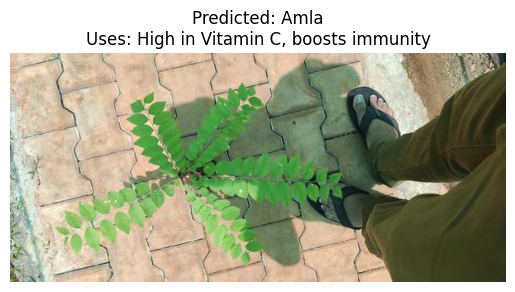

In [ ]:
image_path = '/content/dataset_6/validation/Amla/1396.jpg'
predicted_label, predicted_uses = predict_leaf_name(image_path, model, class_indices)
if predicted_label and predicted_uses:
    plot_image_with_prediction_and_uses(image_path, predicted_label, predicted_uses)

ROC Curve

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step


<ipython-input-38-373b2efe3aca>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_classes)


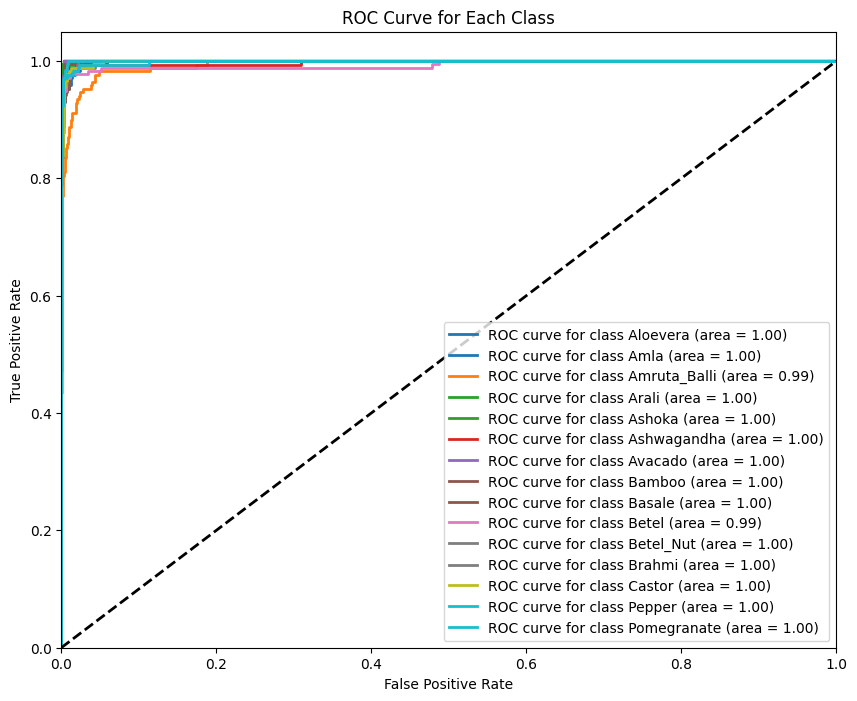

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Get true labels and predictions
true_labels = validation_generator.classes
num_classes = len(class_labels)

# Binarize the output for each class
y_true_bin = label_binarize(true_labels, classes=range(num_classes))

# Make predictions on validation data
predictions = model.predict(validation_generator, steps=steps)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', num_classes)

for i, color in zip(range(num_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"ROC curve for class {class_labels[i]} (area = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend(loc="lower right")
plt.show()

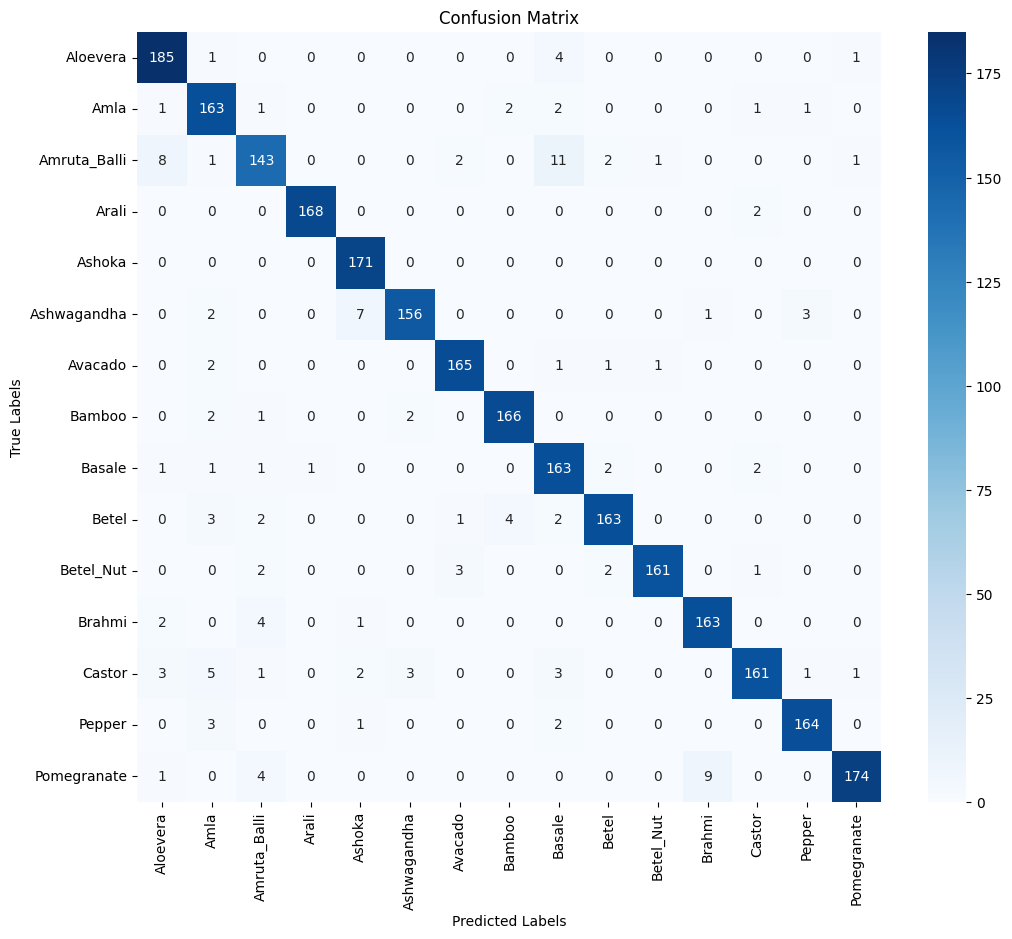

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

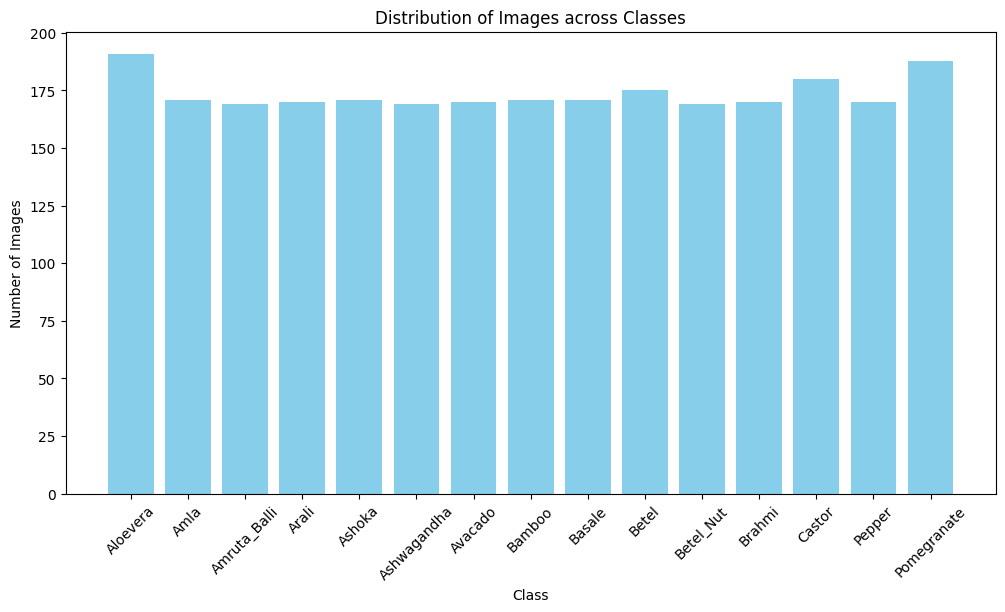

In [ ]:
import collections

# Count the number of images in each class
class_counts = collections.Counter(true_classes)

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_labels, [class_counts[i] for i in range(num_classes)], color="skyblue")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Images across Classes")
plt.xticks(rotation=45)
plt.show()

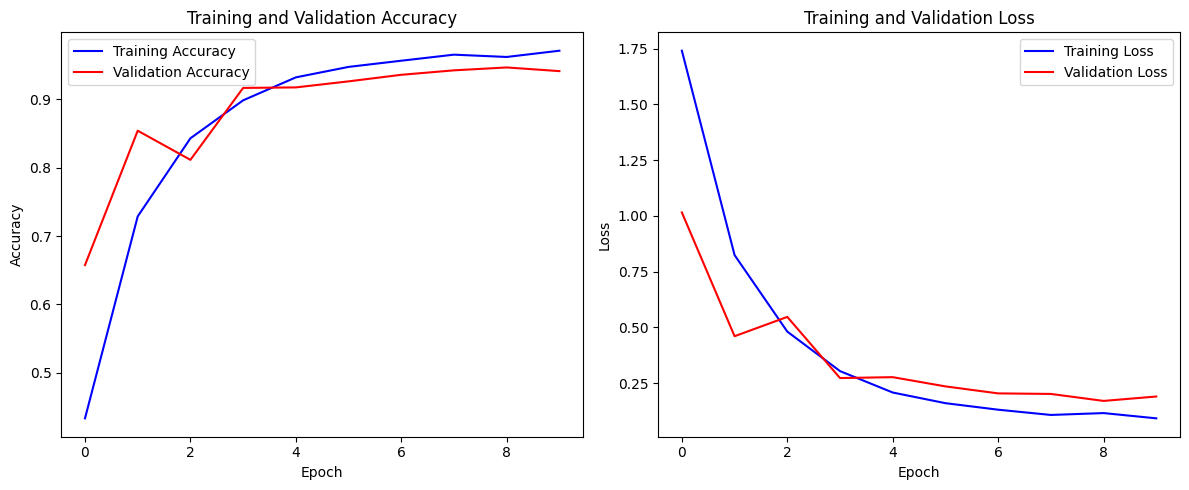

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='b')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

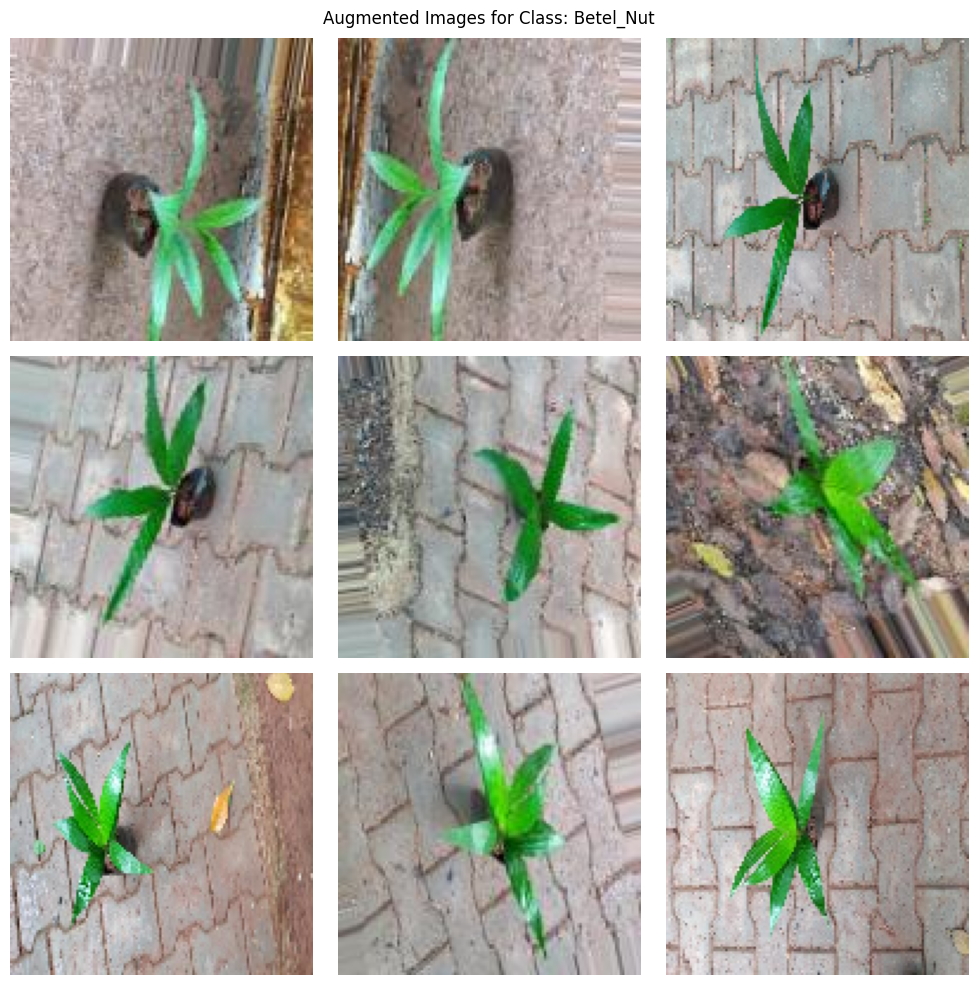

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os

# Define the path to the augmented directory and sample class
augmented_class_dir = os.path.join(augmented_train_dir, classes[0])  # Change index if needed
augmented_images = os.listdir(augmented_class_dir)

# Function to plot a grid of augmented images
def plot_augmented_images(augmented_class_dir, num_images=9):
    """Plots a grid of augmented images for visual inspection."""
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        img_path = os.path.join(augmented_class_dir, augmented_images[i])
        img = load_img(img_path, target_size=(128, 128))  # Resize to the model's input size if needed
        img_array = img_to_array(img) / 255.0  # Normalize the image

        plt.subplot(3, 3, i + 1)  # 3x3 grid
        plt.imshow(img_array)
        plt.axis("off")

    plt.suptitle(f"Augmented Images for Class: {classes[0]}")
    plt.tight_layout()
    plt.show()

# Call the function to display augmented images
plot_augmented_images(augmented_class_dir)